In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.metrics import confusion_matrix

os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'
sns.set(style="whitegrid")

In [43]:
df_raw = pd.read_csv('./data/beer_reviews.csv')
df_raw['is_duplicate'] = df_raw.duplicated(['review_profilename', 'beer_beerid'], keep='first')
df_raw = df_raw[df_raw['is_duplicate'] == False].drop(columns=['is_duplicate']).reset_index(drop=True)

In [44]:
df = df_raw[['beer_beerid', 'review_profilename', 'review_overall']]
df = df.rename(columns={'review_profilename': 'user_id', 'beer_beerid': 'beer_id', 'review_overall': 'review'})

In [45]:
df['review'] = (df['review'] * 2 - 1).apply(int)
df['user_id'] = df['user_id'].astype('category').cat.codes.apply(int)
df['beer_id'] = df['beer_id'].astype('category').cat.codes.apply(int)

df = df[df['review'] > 0].reset_index(drop=True)

In [48]:
pd.DataFrame(df['review'].describe())

,review
count,1571801.000000
mean,6.627837
std,1.441467
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


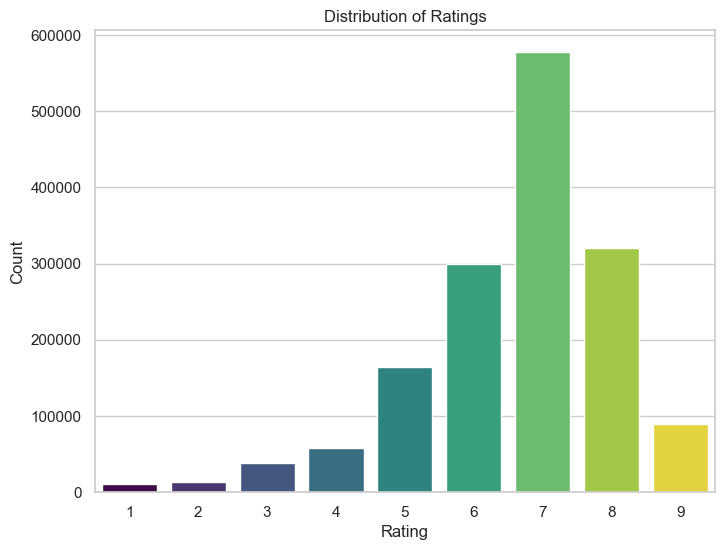

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['review'], hue=df['review'], legend=False, palette="viridis")

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [34]:
df_raw = pd.read_csv('./data/beer_reviews.csv')
df_raw['is_duplicate'] = df_raw.duplicated(['review_profilename', 'beer_beerid'], keep='first')
df_raw = df_raw[df_raw['is_duplicate'] == False].drop(columns=['is_duplicate']).reset_index(drop=True)

top_100_reviewers = df_raw['review_profilename'].value_counts().head(100).index
top_100_beers = df_raw[df_raw['review_profilename'].isin(top_100_reviewers)]['beer_beerid'].value_counts().head(100).index

df = df_raw[(df_raw['beer_beerid'].isin(top_100_beers)) & (df_raw['review_profilename'].isin(top_100_reviewers))].reset_index(drop=True)
df = df[['review_profilename', 'beer_beerid', 'review_overall']]
df = df.rename(columns={'review_profilename': 'user_id', 'beer_beerid': 'beer_id', 'review_overall': 'review'})

df['review'] = (df['review'] * 2 - 1).apply(int)
df['user_id'] = df['user_id'].astype('category').cat.codes.apply(int)
df['beer_id'] = df['beer_id'].astype('category').cat.codes.apply(int)

In [50]:
user_review_counts = df['user_id'].value_counts()
beer_review_counts = df['beer_id'].value_counts()
pd.DataFrame(user_review_counts).head(10)


,count
user_id,
26927,5782
2351,4653
25703,4559
12378,3517
32912,3489
2757,3467
8949,3457
16032,3282
9697,3176


In [51]:
pd.DataFrame(beer_review_counts).head(10)

,count
beer_id,
1783,3207
367,3039
1621,2930
3414,2645
81,2634
934,2632
78,2527
242,2526
29,2480


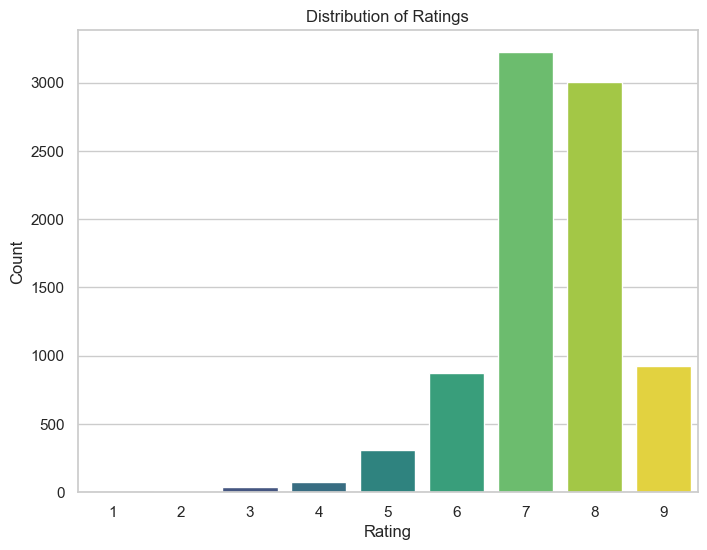

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['review'], hue=df['review'], legend=False, palette="viridis")

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

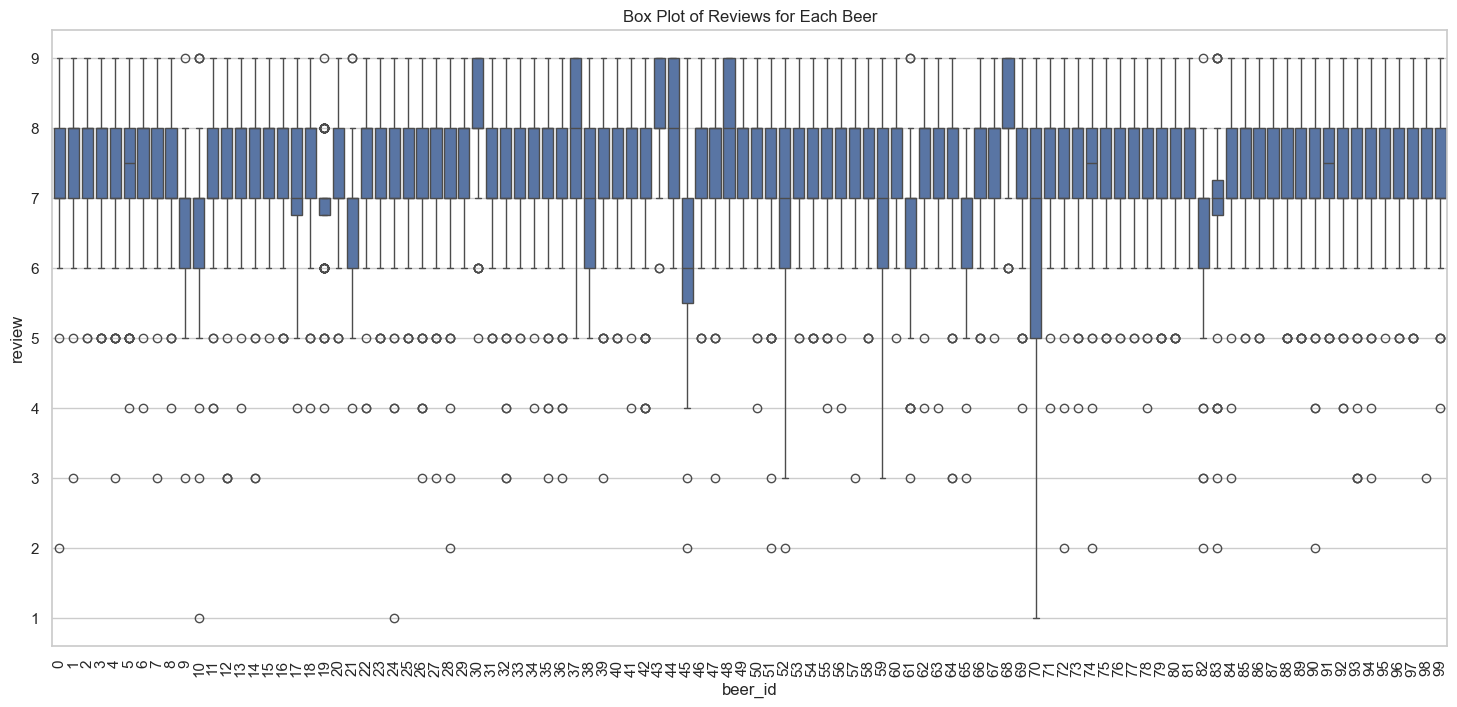

In [38]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='beer_id', y='review', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Reviews for Each Beer')
plt.show()

In [57]:
with open('predictions_train.pkl', 'rb') as file:
    predictions_train = pickle.load(file)

with open('labels_train.pkl', 'rb') as file:
    labels_train = pickle.load(file)

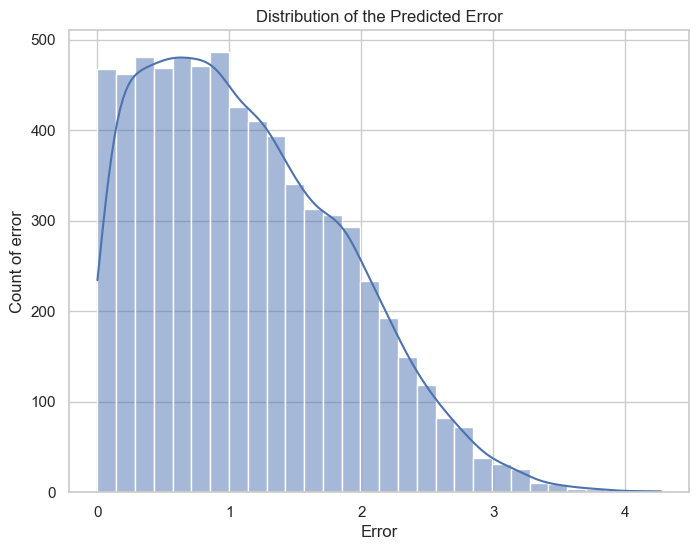

In [79]:
errors = []
labels_train_flat = labels_train.flatten()

for index, prediction in enumerate(predictions_train.flatten()):
    error = abs(prediction - labels_train_flat[index])
    if error: errors.append(error)

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of the Predicted Error')
plt.xlabel('Error')
plt.ylabel('Count of error')
plt.show()